# Assignment 13 (KNN) Zoo Dataset

## Q2. Implement a KNN model to classify the animals in to categorie 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sns.set()

In [2]:
# Loading the dataset
zoo_df = pd.read_csv("Zoo.csv")

In [3]:
zoo_df1 = zoo_df.copy()

In [4]:
zoo_df1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
# Summary Statistics
zoo_df1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


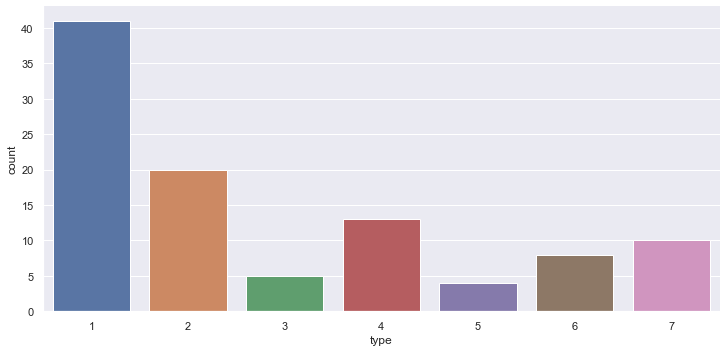

In [6]:
# Displaying factorplot for checking which type has more values
sns.factorplot('type', data=zoo_df1, kind="count",size = 5,aspect = 2)

## As shown in the graphs above, highest number of animals available in Zoo are Type 1 followed by 2, 4 and 7 respectively. 

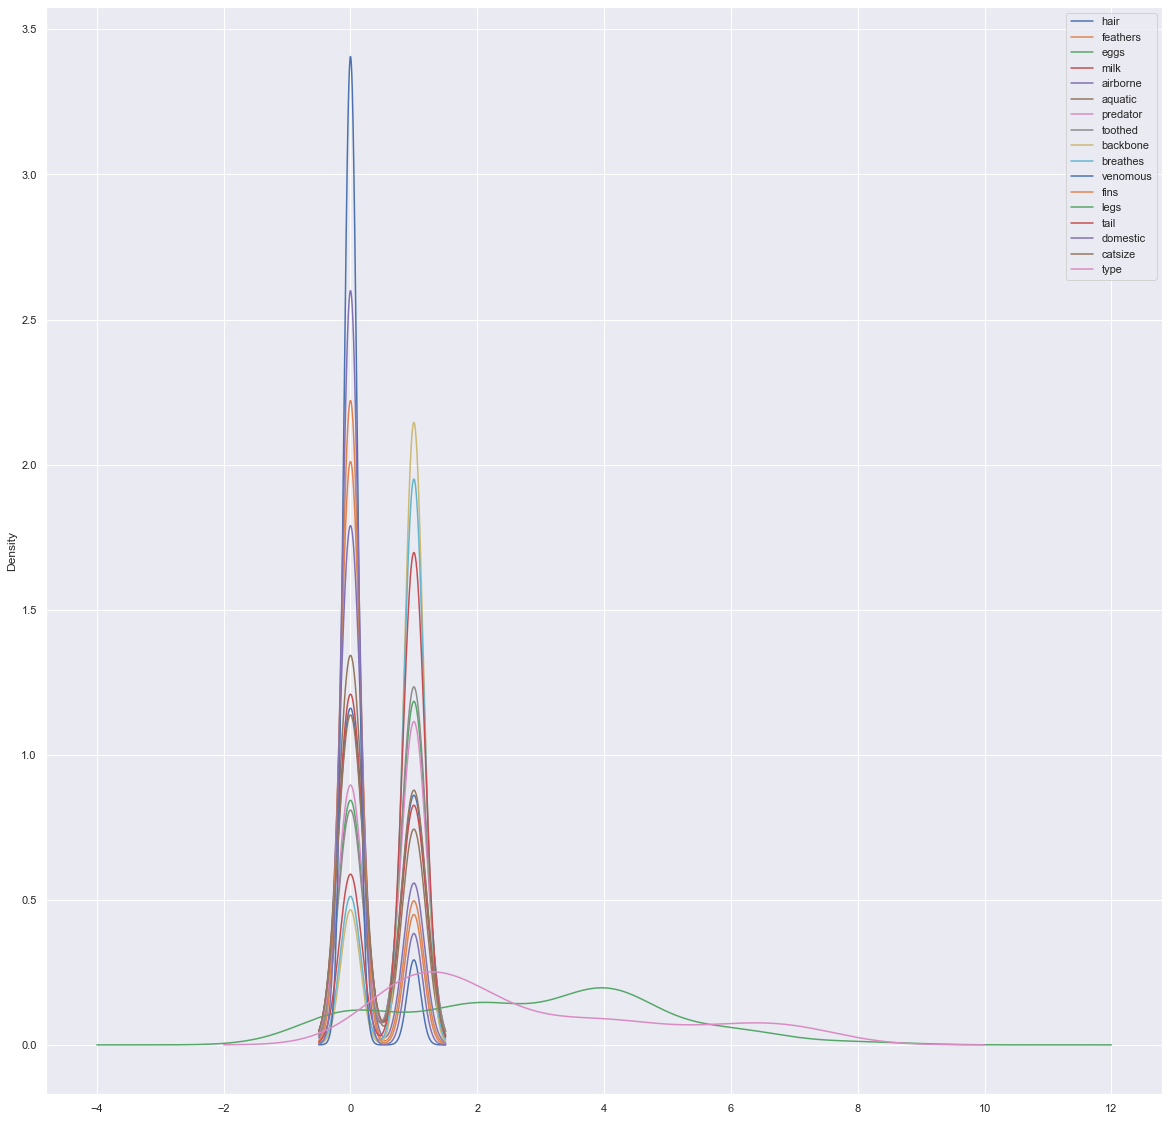

In [7]:
zoo_df1.plot(kind='density', layout=(4,5), figsize=(20,20))
plt.show()

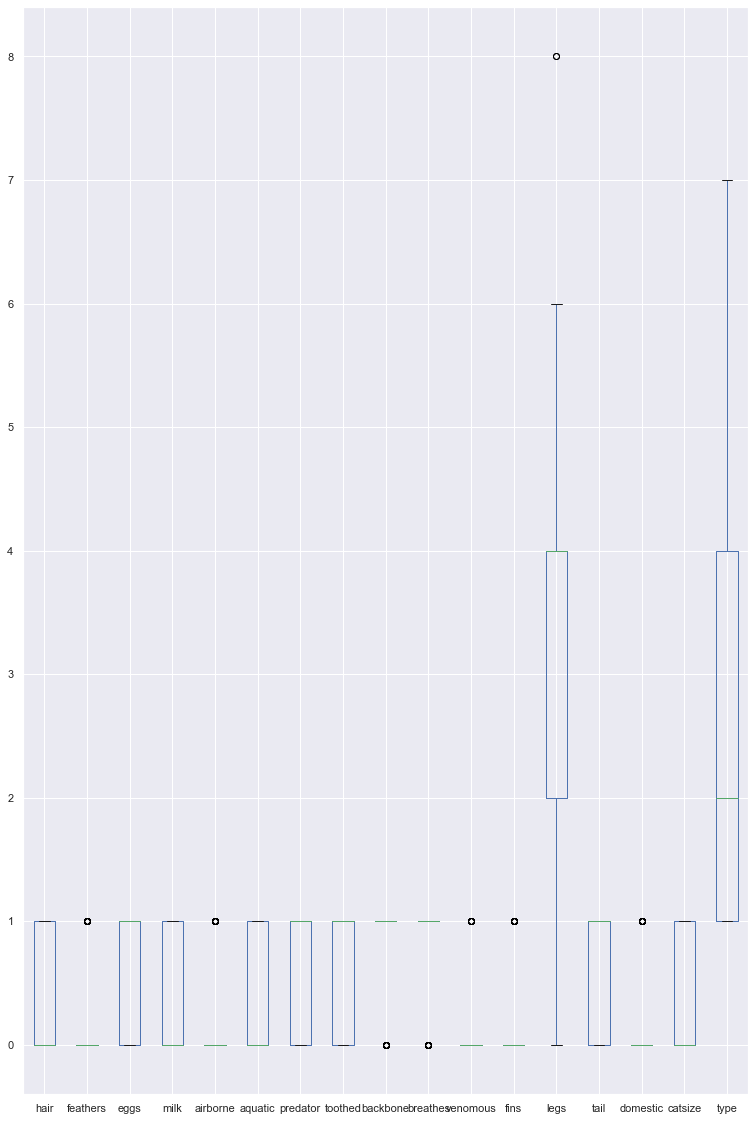

In [8]:
zoo_df1.plot(kind='box', layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

## As shown in the graphs above, majority of the variables are evenly distributed amongst the animals. However some of the variables like airbone, backbone, breathes, venomous, fins, tail and domestic is not evenly distributed (i.e majority of animals either have these variable or dont)

## Finding Correlation between the variables in the data using pearson method

In [9]:
corr = zoo_df1.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.0489732,0.207208,0.45502,-0.562384
feathers,-0.427851,1,0.419248,-0.410761,0.656553,-0.0585517,-0.10443,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.0315862,-0.135934,-0.19752
eggs,-0.817382,0.419248,1,-0.938848,0.376646,0.376244,0.0116051,-0.64215,-0.34042,-0.382777,0.0986888,0.164796,-0.224918,-0.22109,-0.15561,-0.51465,0.661825
milk,0.878503,-0.410761,-0.938848,1,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.0085283,-0.251157,0.0437119,0.00948209,0.0632738,-0.349768,0.0226765
aquatic,-0.473554,-0.0585517,0.376244,-0.362613,-0.172638,1,0.375978,0.0531497,0.0224629,-0.637506,0.0879151,0.604492,-0.360638,-0.0346423,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.10443,0.0116051,-0.029721,-0.295181,0.375978,1,0.129452,0.0510223,-0.262931,0.115391,0.190302,-0.099723,0.0189466,-0.309794,0.14479,0.0611793
toothed,0.492531,-0.613631,-0.64215,0.628168,-0.594311,0.0531497,0.129452,1,0.575085,-0.0656904,-0.0623445,0.364292,-0.193476,0.310368,0.0694305,0.34401,-0.471527
backbone,0.191681,0.231403,-0.34042,0.384958,-0.104718,0.0224629,0.0510223,0.575085,1,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.0656904,0.207666,1,-0.120752,-0.617219,0.369868,0.0889516,0.124068,0.204125,-0.519308


## Milk and hair have high correlation value 0.87

## KNN

## Finding optimal number of K 

In [10]:
x = zoo_df1.iloc[:,1:17]
y = zoo_df1.iloc[:,17]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [12]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [13]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

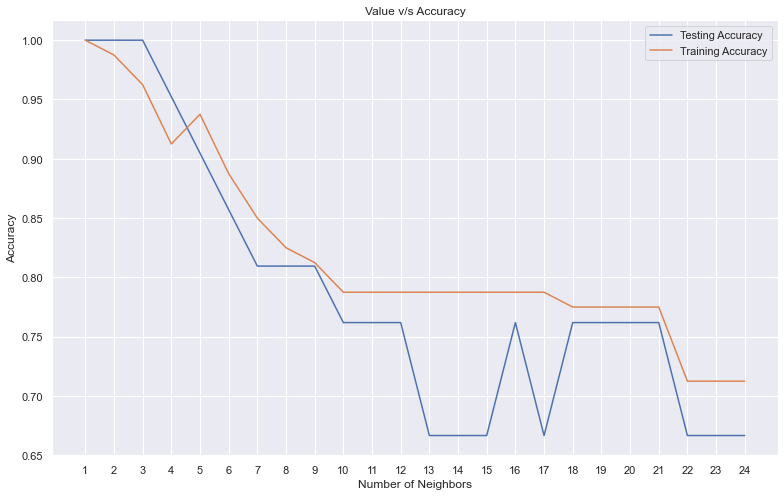

In [14]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value v/s Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

## As shown in the graph, with K=5 we can achieve accurary of 90%.

## Applying the KNN Algorithm

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [17]:
y_pred_KNeighborsClassifier

array([5, 4, 1, 1, 6, 4, 1, 6, 4, 2, 1, 1, 1, 2, 7, 2, 4, 7, 1, 2, 4],
      dtype=int64)

In [18]:
scores = []
cv_scores = []

In [19]:
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scores.append(score)

In [20]:
score_knn=cross_val_score(knn, x,y, cv=10)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [21]:
score_knn.mean()

0.8960703185703185

In [22]:
score_knn.std()*2

0.14243879619172317

In [23]:
cv_score = score_knn.mean()

In [24]:
cv_scores.append(cv_score)

In [25]:
cv_scores

[0.8960703185703185]

## We got approximately 90% accuracy with k=5. 